# Working with Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

Plotting Graph

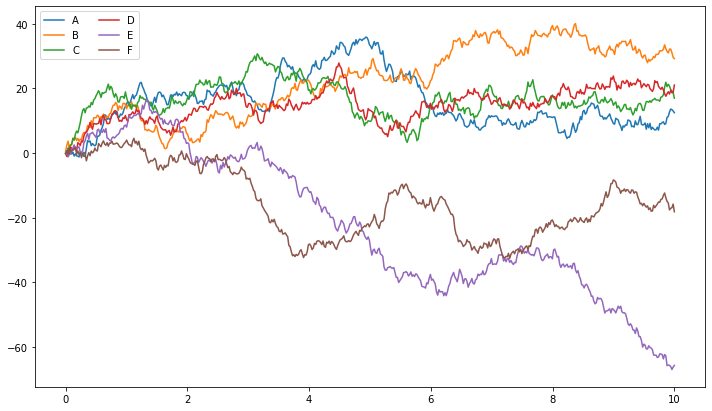

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

# Inrteracting with Data

In [4]:
import requests
import pandas as pd

In [6]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Pulling data from Bitcoin and Ether

In [7]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 00:33:53.812221')

In [8]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [9]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [10]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 01:00:00,18919,18983,18919,18966,19.319676,366201.047529
2022-09-25 02:00:00,18964,18992,18921,18979,10.028071,190101.735694
2022-09-25 03:00:00,18982,18982,18920,18951,24.818349,470345.580897
2022-09-25 04:00:00,18959,19054,18932,19051,28.795480,547113.744999
2022-09-25 05:00:00,19047,19063,19007,19009,15.506458,295239.647753


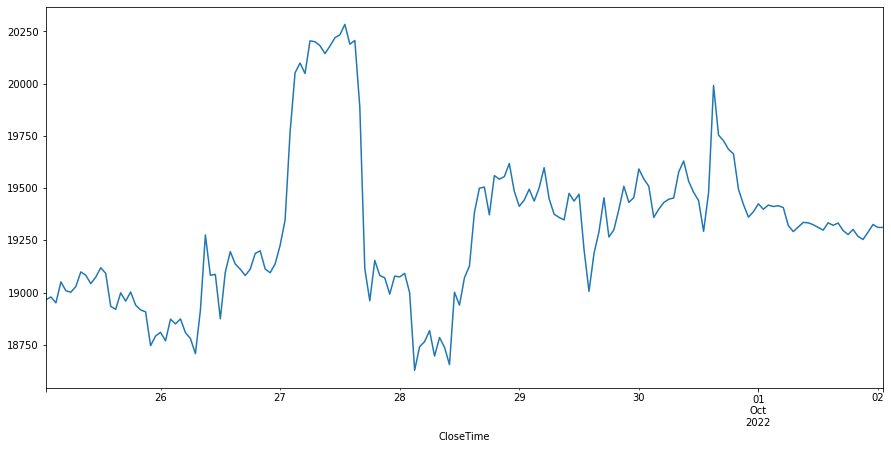

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 01:00:00,1318.5,1324.0,1314.8,1321.2,653.324625,861880.125805
2022-09-25 02:00:00,1321.5,1325.4,1318.7,1321.5,622.523345,822934.253934
2022-09-25 03:00:00,1321.5,1322.4,1316.6,1321.1,470.634185,621399.398704
2022-09-25 04:00:00,1321.3,1329.4,1318.9,1329.4,686.220965,909668.928764
2022-09-25 05:00:00,1329.4,1330.0,1325.2,1327.9,382.536531,507752.675057


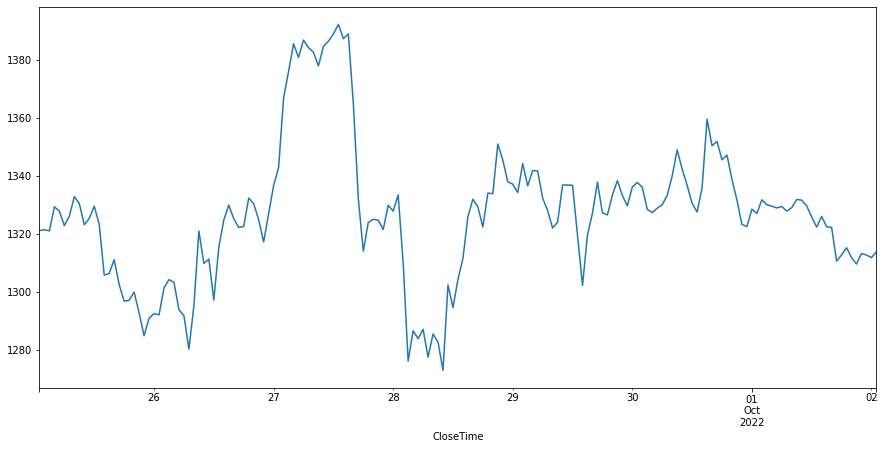

In [13]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 01:00:00,1318.5,1324.0,1314.8,1321.2,653.324625,861880.125805
2022-09-25 02:00:00,1321.5,1325.4,1318.7,1321.5,622.523345,822934.253934
2022-09-25 03:00:00,1321.5,1322.4,1316.6,1321.1,470.634185,621399.398704
2022-09-25 04:00:00,1321.3,1329.4,1318.9,1329.4,686.220965,909668.928764
2022-09-25 05:00:00,1329.4,1330.0,1325.2,1327.9,382.536531,507752.675057


# Dynamic Plots with Bokeh

In [16]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [17]:
output_notebook()

In [18]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

# Exporting to Excel

In [19]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [20]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [21]:
eth.to_excel(writer, sheet_name='Ether')

In [22]:
writer.save()